# Pymaceuticals Inc.
---

### Analysis

- Added my analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on= 'Mouse ID')


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mouse = len(merged_data["Mouse ID"].unique())
total_mouse

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_number = len(cleaned_df["Mouse ID"].unique())
cleaned_number


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
grouped_cleaned_df = cleaned_df.groupby("Drug Regimen")
mean_tumor_volume = grouped_cleaned_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_cleaned_df["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_cleaned_df["Tumor Volume (mm3)"].var()
std_tumor_volume = grouped_cleaned_df["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_cleaned_df["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_advanced = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_statistics_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

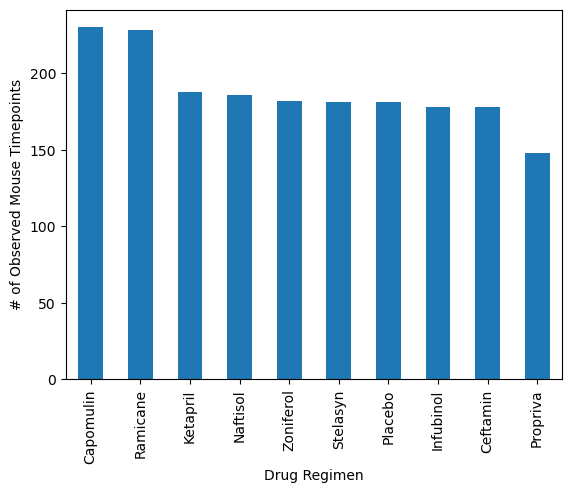

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', width= 0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlim(-0.5, len(drug_regimen_counts)-0.5)
plt.show()

In [10]:
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
summary_statistics_advanced_copy = summary_statistics_advanced.copy()
summary_statistics_advanced_copy['Counts'] = drug_regimen_counts
summary_statistics = summary_statistics_advanced_copy.reset_index()
summary_statistics = summary_statistics.sort_values("Counts", ascending=False)

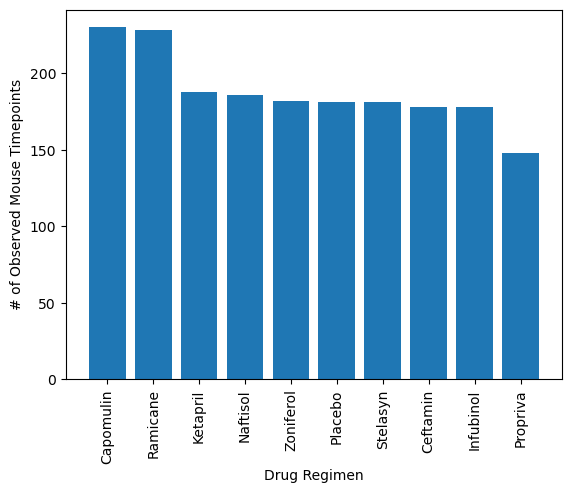

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = summary_statistics["Drug Regimen"]
y_axis = summary_statistics["Counts"]
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlim(-0.9, len(x_axis)-0.1)
plt.bar(x_axis, y_axis, align="center", width=0.8)
plt.show()

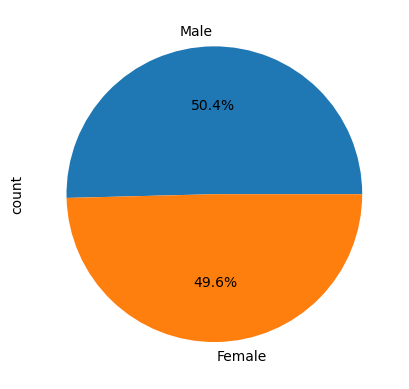

In [30]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
female_count = len(cleaned_df.loc[cleaned_df["Sex"] == "Female"]["Mouse ID"].unique())
male_count = len(cleaned_df.loc[cleaned_df["Sex"] == "Male"]["Mouse ID"].unique())

sex_distribution = pd.Series([male_count, female_count], index=["Male", "Female"])
sex_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('count')
# Make the pie chart
plt.show()

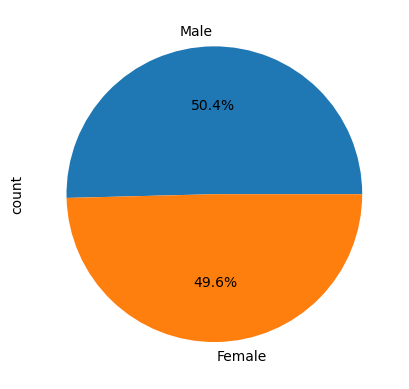

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["Male", "Female"]
sizes = [male_count, female_count]
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%")
plt.ylabel('count')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_last_timepoint[merged_last_timepoint['Drug Regimen'].isin(treatment_regimens)]


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(tumor_volumes)


    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]


    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


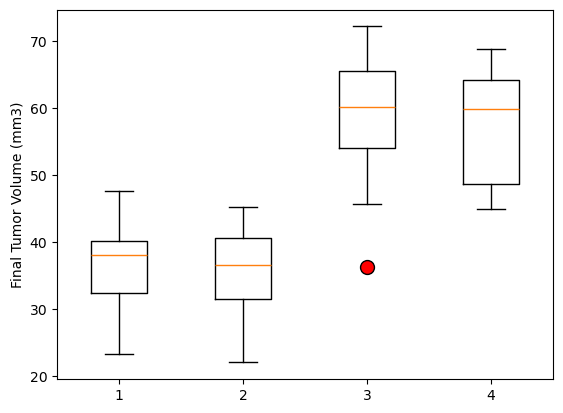

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
design = dict(marker='o', color='r', markerfacecolor='r', markeredgecolor='black', markersize=10)

plt.boxplot(tumor_vol_data, flierprops= design)
plt.show()

## Line and Scatter Plots

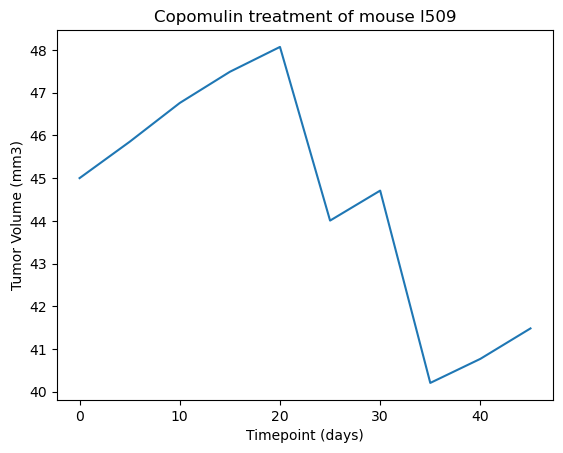

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# This way is for randomly selected mouse
# capomulin_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
# random_mouse_id = capomulin_data['Mouse ID'].sample(n=1).values[0]
# mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == random_mouse_id]
# plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
#plt.title(f'Capomulin treatment of mouse {random_mouse_id}')


# For specific mouse ID
mouse_id = 'l509'
mouse_data = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == mouse_id)]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title(f'Copomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

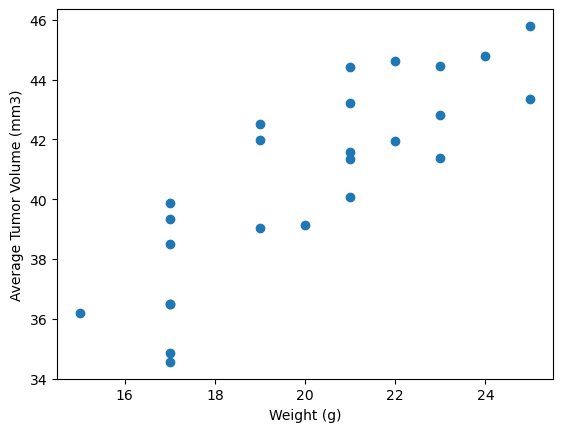

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()


plt.scatter(mouse_weights, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


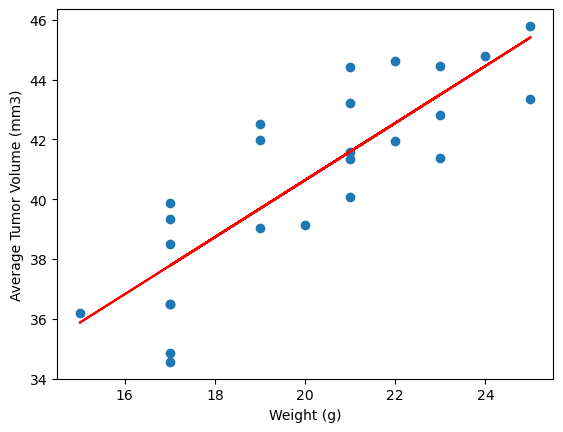

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weights, avg_tumor_volume)
regress_values = mouse_weights * slope + intercept

correlation = st.pearsonr(mouse_weights,avg_tumor_volume)

plt.scatter(mouse_weights, avg_tumor_volume)
plt.plot(mouse_weights, regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")